# 1.0 Import Library and File

In [1]:
import pandas as pd

In [2]:
stud_data = pd.read_csv('BinarySelectedFeatures.csv')
stud_data.head()

,at_risk_binary_encoded,studied_credits,num_of_prev_attempts,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score,imd_band,highest_education
0,0,60,0,2,2,27.0,744.0,717.0,68.7,20-30%,A Level or Equivalent
1,0,60,0,8,1,302.0,4104.0,3802.0,71.6,80-90%,Lower Than A Level
2,0,60,0,3,2,127.0,1944.0,1817.0,76.0,30-40%,A Level or Equivalent
3,0,60,0,6,3,31.0,1150.0,1119.0,77.1,60-70%,HE Qualification
4,0,60,0,3,1,88.0,1896.0,1808.0,69.9,30-40%,Lower Than A Level


# 2.0 Data Preparation

Create a copy of stud_data excluding object data types

In [3]:
stud_numeric_data = stud_data.select_dtypes(exclude=['object']).copy()

In [4]:
stud_numeric_data

,at_risk_binary_encoded,studied_credits,num_of_prev_attempts,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score
0,0,60,0,2,2,27.0,744.0,717.0,68.7
1,0,60,0,8,1,302.0,4104.0,3802.0,71.6
2,0,60,0,3,2,127.0,1944.0,1817.0,76.0
3,0,60,0,6,3,31.0,1150.0,1119.0,77.1
4,0,60,0,3,1,88.0,1896.0,1808.0,69.9
...,...,...,...,...,...,...,...,...,...
32588,0,30,0,3,3,0.0,598.0,598.0,0.0
32589,0,30,0,4,1,0.0,389.0,389.0,0.0
32590,1,30,0,6,2,0.0,283.0,283.0,0.0
32591,1,30,0,0,1,21.0,112.0,91.0,0.0


# 3.0 Model Building

In [5]:
# Feature selection
X = stud_numeric_data.drop(columns=['at_risk_binary_encoded'])
y = stud_numeric_data['at_risk_binary_encoded']

## 3.1 Split the Data

In [6]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.2 Train Model and Make Prediction

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model_binary = DecisionTreeClassifier(random_state=42)
dt_model_binary.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model_binary.predict(X_test_scaled)

## 3.3 Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8805
Confusion Matrix:
[[2678  401]
 [ 378 3062]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3079
           1       0.88      0.89      0.89      3440

    accuracy                           0.88      6519
   macro avg       0.88      0.88      0.88      6519
weighted avg       0.88      0.88      0.88      6519



In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Compute probabilities of the positive class (class 1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Create a DataFrame to display ROC AUC value
    roc_auc_df = pd.DataFrame({'Class': ['Binary'], 'ROC AUC': [roc_auc]})
    
    # Display the DataFrame
    print("ROC AUC value for binary classification:")
    print(roc_auc_df)

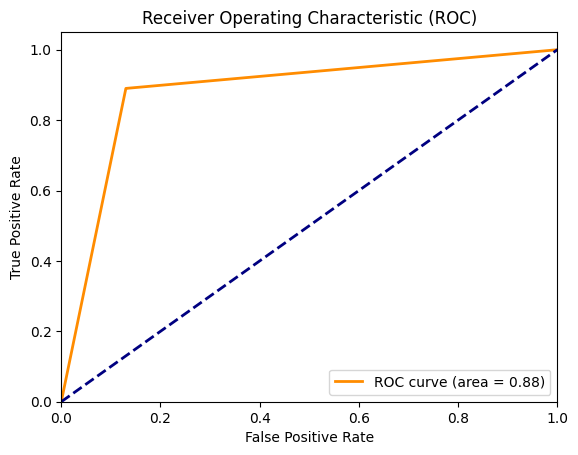

ROC AUC value for binary classification:
    Class   ROC AUC
0  Binary  0.879922


In [11]:
plot_roc_curve(dt_model_binary, X_test_scaled, y_test)

Function to check underfitting or overfitting

In [12]:
# Train Accuracy
train_accuracy = dt_model_binary.score(X_train_scaled, y_train)
# Test Accuracy
test_accuracy = dt_model_binary.score(X_test_scaled, y_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy > test_accuracy:
    if (train_accuracy - test_accuracy) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy < test_accuracy:
    if(test_accuracy - train_accuracy) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")

Train Accuracy: 0.9999
Test Accuracy: 0.8805

The model might be overfitting.


Plot Learning Curve

In [13]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

# Function to check underfitting or overfitting
def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10)):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', estimator)
    ])
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy', shuffle=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.ylim(0.0, 1.0)  # Set y-axis from 0 to 1
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


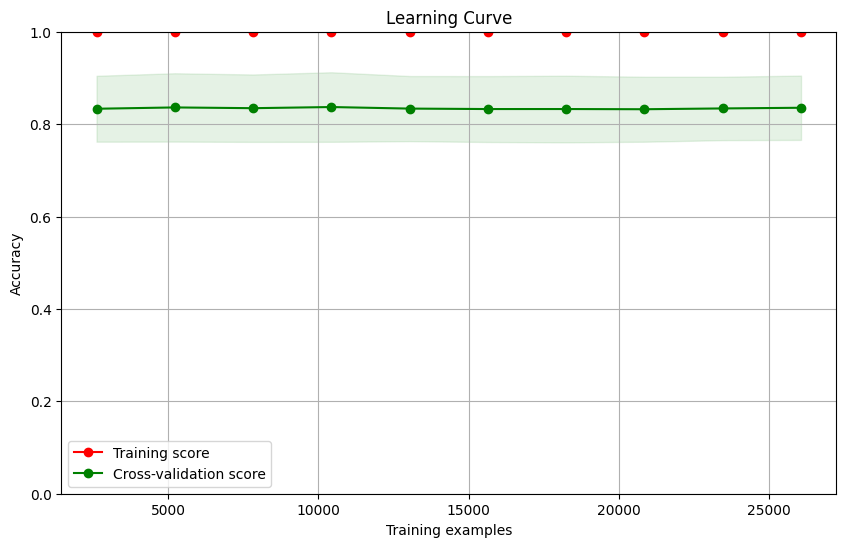

In [14]:
# Plot learning curve
plot_learning_curve(dt_model_binary, X, y)

# 4.0 Hyperparameter Tuning

## 4.1 Parameter

In [15]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

## 4.2 Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=3)

In [17]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best parameters found: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.9141


## 4.3 Train Model with Best Parameters

In [18]:
# Evaluate the best model on the test data
best_dt_model_binary = grid_search.best_estimator_
y_pred_best = best_dt_model_binary.predict(X_test_scaled)

## 4.4 Model Evaluation

In [19]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best Model Test Accuracy: {accuracy_best:.4f}')
print('Best Model Confusion Matrix:')
print(conf_matrix_best)
print('Best Model Classification Report:')
print(class_report_best)

Best Model Test Accuracy: 0.9092
Best Model Confusion Matrix:
[[2936  143]
 [ 449 2991]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3079
           1       0.95      0.87      0.91      3440

    accuracy                           0.91      6519
   macro avg       0.91      0.91      0.91      6519
weighted avg       0.91      0.91      0.91      6519



Plot ROC Curve

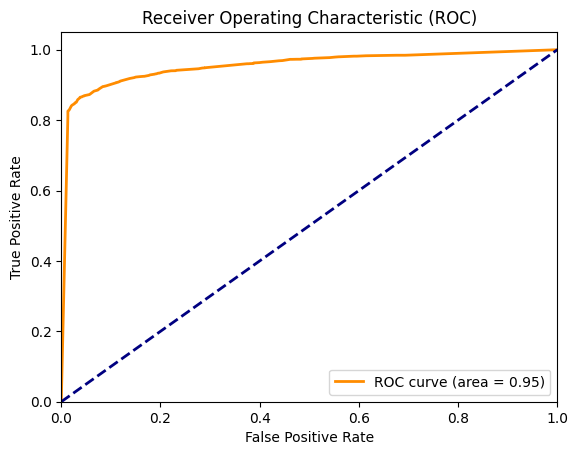

ROC AUC value for binary classification:
    Class   ROC AUC
0  Binary  0.953952


In [20]:
# Plot ROC Curve for the best model
plot_roc_curve(best_dt_model_binary, X_test_scaled, y_test)

Plot Learning Curve

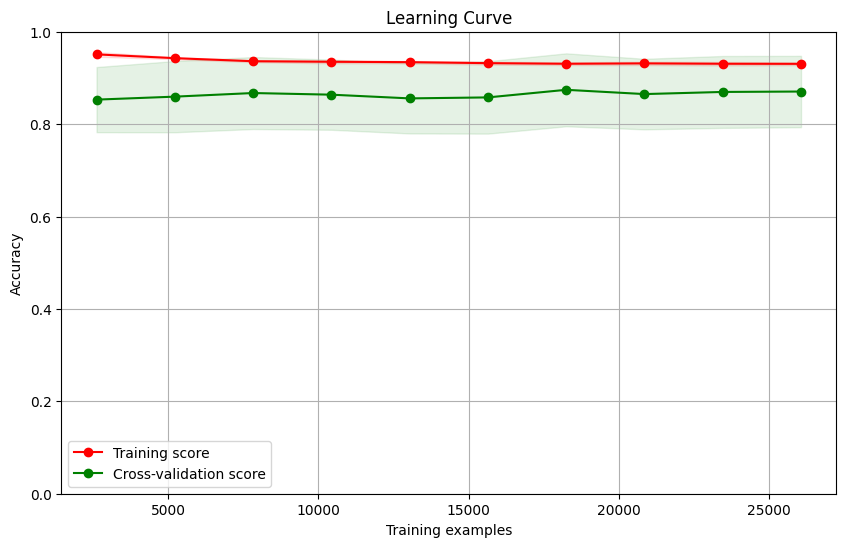

In [21]:
# Plot learning curve for the best model
plot_learning_curve(best_dt_model_binary, X, y)

Check for Overfitting or Underfitting

In [22]:
# Train Accuracy
train_accuracy_best = best_dt_model_binary.score(X_train_scaled, y_train)
# Test Accuracy
test_accuracy_best = best_dt_model_binary.score(X_test_scaled, y_test)

print(f'Train Accuracy: {train_accuracy_best:.4f}')
print(f'Test Accuracy: {test_accuracy_best:.4f}')

if train_accuracy_best > test_accuracy_best:
    if (train_accuracy_best - test_accuracy_best) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy_best < test_accuracy_best:
    if(test_accuracy_best - train_accuracy_best) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")

Train Accuracy: 0.9301
Test Accuracy: 0.9092

The model seems to be fitting well.


# 5.0 Feature Importance

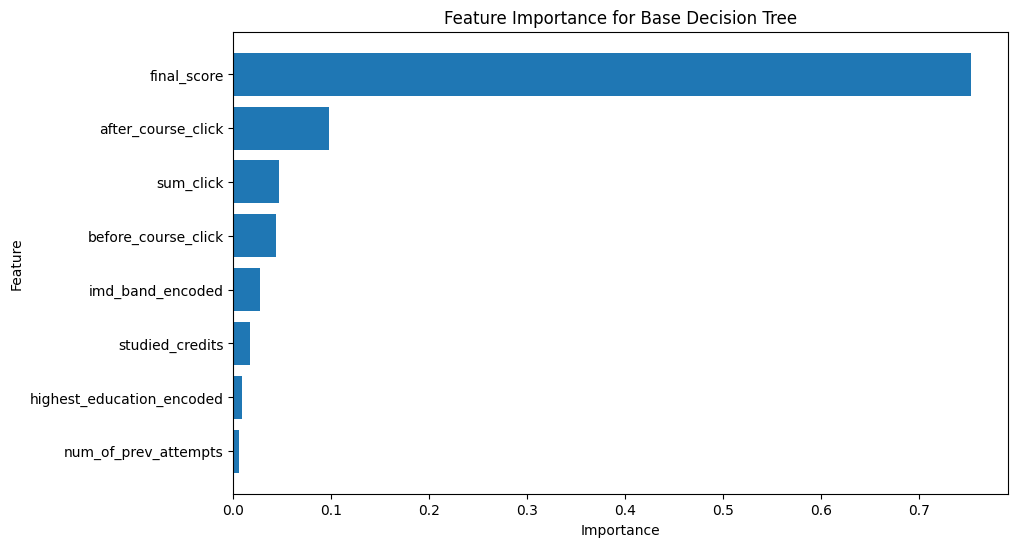

Feature Importances for Base Decision Tree:


,Feature,Importance
7,final_score,0.753070
6,after_course_click,0.098164
5,sum_click,0.047092
4,before_course_click,0.043120
2,imd_band_encoded,0.026947
0,studied_credits,0.016993
3,highest_education_encoded,0.009086
1,num_of_prev_attempts,0.005529


In [23]:
# Ensure that X_train_scaled is a DataFrame with columns names matching the original features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Get the feature importances from the best Decision Tree model
feature_importances = dt_model_binary.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Base Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Display the feature importances
print("Feature Importances for Base Decision Tree:")
feature_importance_df

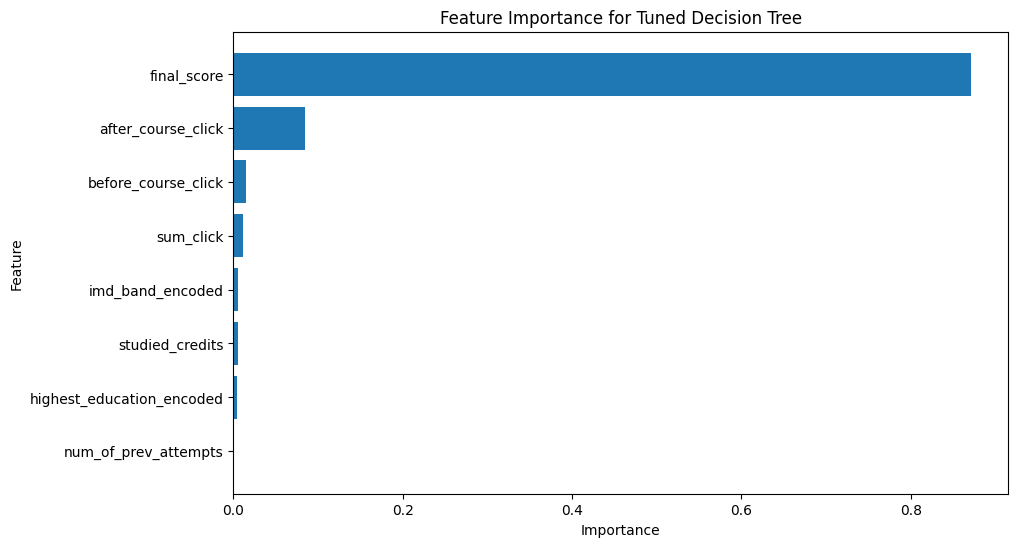

Feature Importances for Tuned Decision Tree:


,Feature,Importance
7,final_score,0.871517
6,after_course_click,0.084399
4,before_course_click,0.015203
5,sum_click,0.011870
2,imd_band_encoded,0.005945
0,studied_credits,0.005858
3,highest_education_encoded,0.004146
1,num_of_prev_attempts,0.001063


In [24]:
# Ensure that X_train_scaled is a DataFrame with columns names matching the original features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Get the feature importances from the best Decision Tree model
feature_importances_tuned = best_dt_model_binary.feature_importances_

# Create a DataFrame for feature importances
feature_importance_tuned_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': feature_importances_tuned
})

# Sort the DataFrame by importance
feature_importance_tuned_df = feature_importance_tuned_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_tuned_df['Feature'], feature_importance_tuned_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Tuned Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Display the feature importances
print("Feature Importances for Tuned Decision Tree:")
feature_importance_tuned_df

# Save Model

In [25]:
import joblib
# Save the model
joblib.dump(dt_model_binary, 'Model/Base/dt_model_binary.pkl')

['Model/Base/dt_model_binary.pkl']

In [26]:
import joblib
# Save the model
joblib.dump(best_dt_model_binary, 'Model/Tuned/best_dt_model_binary.pkl')

['Model/Tuned/best_dt_model_binary.pkl']